<a href="https://colab.research.google.com/github/xmsi/tf2_tasks/blob/main/tf2_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
type(data)

sklearn.utils.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
data.data.shape

# 150 items 4 features X

(150, 4)

In [6]:
data.target[0:100]

# only 0 and 1 in 0:100 Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data[0:100], data.target[0:100], test_size=0.33)
N, D = X_train.shape 

In [10]:
D

4

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#tf2 works here!
import tensorflow as tf

model = tf.keras.models.Sequential([
                         tf.keras.layers.Input(shape=(D,)),
                         tf.keras.layers.Dense(1, activation='sigmoid')          
])

#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
3/3 [==============================] - 1s 88ms/step - loss: 0.9981 - accuracy: 0.2687 - val_loss: 0.9658 - val_accuracy: 0.3030
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 0.9921 - accuracy: 0.2687 - val_loss: 0.9600 - val_accuracy: 0.3030
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 0.9861 - accuracy: 0.2836 - val_loss: 0.9541 - val_accuracy: 0.3030
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 0.9801 - accuracy: 0.2836 - val_loss: 0.9482 - val_accuracy: 0.3333
Epoch 5/200
3/3 [==============================] - 0s 13ms/step - loss: 0.9742 - accuracy: 0.2985 - val_loss: 0.9424 - val_accuracy: 0.3333
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 0.9684 - accuracy: 0.2985 - val_loss: 0.9366 - val_accuracy: 0.3333
Epoch 7/200
3/3 [==============================] - 0s 19ms/step - loss: 0.9626 - accuracy: 0.2985 - val_loss: 0.9310 - val_accuracy: 0.3333
Epoch 8/200
3/3 [===

In [13]:
print('Train score', model.evaluate(X_train,y_train))
print('Test score', model.evaluate(X_test,y_test))

3/3 [==============================] - 0s 9ms/step - loss: 0.3424 - accuracy: 0.9403
Train score [0.342352032661438, 0.9402984976768494]
2/2 [==============================] - 0s 7ms/step - loss: 0.3106 - accuracy: 0.9697
Test score [0.3105735182762146, 0.9696969985961914]


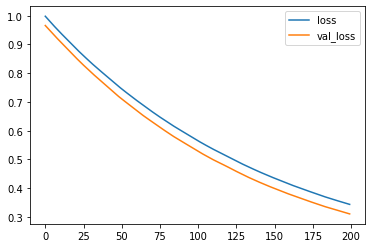

In [14]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label ='val_loss')
plt.legend()

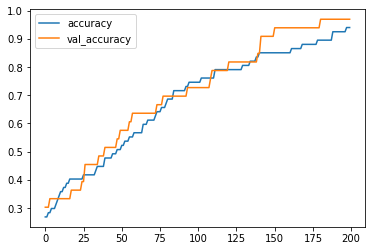

In [15]:
plt.plot(r.history['accuracy'],label ='accuracy')
plt.plot(r.history['val_accuracy'],label ='val_accuracy')
plt.legend()

In [16]:
P = model.predict(X_test)
print(P)

[[0.90195   ]
 [0.38037896]
 [0.6149642 ]
 [0.32924587]
 [0.31949356]
 [0.58183837]
 [0.2543989 ]
 [0.21764669]
 [0.16980287]
 [0.73259175]
 [0.2289263 ]
 [0.28729182]
 [0.9049752 ]
 [0.6375998 ]
 [0.8744104 ]
 [0.20970899]
 [0.17934638]
 [0.12293184]
 [0.71177244]
 [0.24923897]
 [0.4590645 ]
 [0.65620065]
 [0.1665904 ]
 [0.08096433]
 [0.19530743]
 [0.77109456]
 [0.4103527 ]
 [0.27140516]
 [0.89201015]
 [0.3600503 ]
 [0.8790517 ]
 [0.08704317]
 [0.36372024]]


In [20]:
import numpy as np

P = np.round(P).flatten()
print(P)

[1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0.]


In [21]:
print("Mannualy calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Mannualy calculated accuracy: 0.9696969696969697
2/2 [==============================] - 0s 7ms/step - loss: 0.3106 - accuracy: 0.9697
Evaluate output: [0.3105735182762146, 0.9696969985961914]
